Classification Models
1. Distance based  :

    a) KNN
    
    b) SVM

distance formulae : manhattan, euclidean, minkowski, supremum, Hamming, jaccard STUDY !!!

Numerical data : manhattan, euclidean, minkowski, supremum

Categorical data : Jaccard

Binary data : Hamming

NLP data : Cosine disance

In [80]:
# 1. In KNN : best value of k is the sqrt of no. of rows of training data.
# This is called as practitioner's rule

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.shape

(284, 3)

In [ ]:
df.describe()

,Age,Salary,Purchased
count,284.000000,284.000000,284.000000
mean,40.746479,73535.211268,0.500000
std,10.196609,36214.254846,0.500883
min,18.000000,16000.000000,0.000000
25%,35.000000,43750.000000,0.000000
50%,40.000000,72000.000000,0.500000
75%,48.000000,96000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = df.drop('Purchased',axis=1).values
y = df['Purchased'].values

print(x.shape,y.shape)

(284, 2) (284,)


In [ ]:
sc = StandardScaler()
xsc = sc.fit_transform(x)
# fit calculates mean and std of both columns of the df

xsc.shape

(284, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(xsc,y,test_size=0.2,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(227, 2) (57, 2) (227,) (57,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(xtrain,ytrain).score(xtest,ytest)

0.9122807017543859

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
ConfusionMatrixDisplay, classification_report


In [ ]:
yhat = model.predict(xtest)

print("Overall accuracy score : ", accuracy_score(ytest,yhat))

Overall accuracy score :  0.9122807017543859


In [ ]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        24
           1       0.87      1.00      0.93        33

    accuracy                           0.91        57
   macro avg       0.93      0.90      0.91        57
weighted avg       0.92      0.91      0.91        57



In [ ]:
cm = confusion_matrix(ytest,yhat)
print(cm)

[[19  5]
 [ 0 33]]


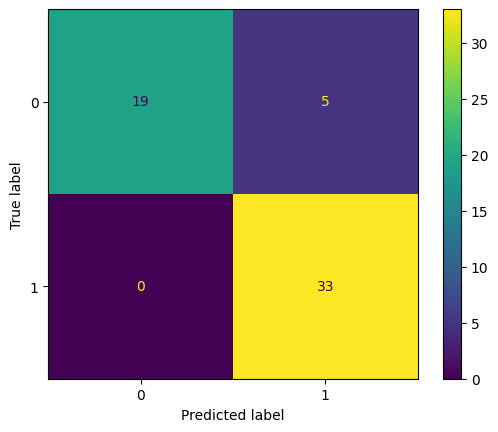

In [ ]:
ConfusionMatrixDisplay(cm).plot()

(80, 89) (80, 89)


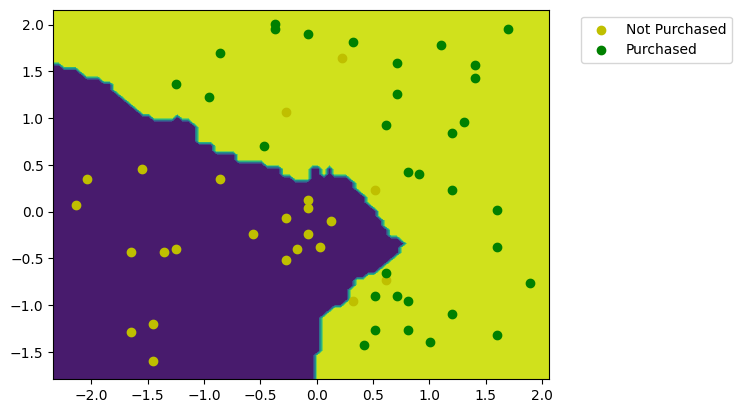

In [ ]:
age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.05)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.05)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = model.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)